In [1]:
import os
import glob
import pandas as pd
import datetime
import matplotlib.pyplot as plt

cameras = [
    ["CAM02009CCTV7.jpg", 
     "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)","no change",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", 
     "Port Matilda US-322 By-Pass Westbound","changed 4/27",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", 
     "Port Matilda I-99 Exit 61 Median","no change",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", 
     "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220","no change",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", 
     "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150","changed 4/27",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg",
     "Grays Woods","changed 5/3",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg",
     "I-99 at Exit 71 (Toftrees)","changed 5/5",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg",
     "Snowshoe I-80 Exit 147","no change",41.022703,-77.933981],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219]
    ]

camdfs = pd.DataFrame(cameras,columns = ['ID','Description','status','Latitude','Longitude'])
camdfs[['ID','Description','status']]

ID                                        Description  \
0    CAM02009CCTV7.jpg  I-80 Eastbound Exit 161 Bellefonte Interchange...   
1    CAM02001CCTV2.jpg              Port Matilda US-322 By-Pass Westbound   
2   CAM02010CCTV11.jpg                   Port Matilda I-99 Exit 61 Median   
3    CAM02005CCTV9.jpg  Milesburg Interchange West I-80 Exit 158 Eastb...   
4   CAM02006CCTV10.jpg  Milesburg Interchange East I-80 Exit 158 Westb...   
5   CAM02028CCTV32.jpg                          Atherton and Valley Vista   
6   CAM02037CCTV43.jpg                                 Atherton and Vairo   
7   CAM02038CCTV44.jpg                           Atherton and North Hills   
8   CAM02039CCTV45.jpg                                  Atherton and Park   
9   CAM02040CCTV46.jpg                             Atherton and W.College   
10  CAM02042CCTV49.jpg                              Atherton and W.Beaver   
11   CAM02003CCTV4.jpg                            I-99/US-322 Interchange   
12  CAM02020CCTV24.jpg                                        Benner Pike   
13   CAM02002CCTV3.jpg                                        Grays Woods   
14  CAM02007CCTV13.jpg                                   US-322 E/O PA-26   
15  CAM02046CCTV52.jpg                         I-99 at Exit 71 (Toftrees)   
16  CAM02033CCTV38.jpg                             Snowshoe I-80 Exit 147   
17      collegeTwp.jpg                    College Township Traffic camera   
18   parkArboretum.jpg                                      PSU Park Ave.   

                            status  
0                        no change  
1                     changed 4/27  
2                        no change  
3                        no change  
4                     changed 4/27  
5                        no change  
6                        no change  
7                        no change  
8                        no change  
9                      changed 5/2  
10  changed 5/2-5/4, then returned  
11                     changed 5/1  
12  changed 5/6-5/7, then returned  
13                     changed 5/3  
14                     changed 5/4  
15                     changed 5/5  
16                       no change  
17                       no change  
18                       no change

In [2]:
# Loading all camera data...

#xdf = pd.read_csv("/home/ubuntu/nitelite/full_vehicles_427-615-partial-all-cameras.csv")
xdf = pd.read_csv("allcams1012.csv")
xdf['datetime_EST'] = pd.to_datetime(xdf['datetime_EST'])
xdf.sort_values(by='datetime_EST')



datetime_UTC  \
0        2020-04-27 00:00:02   
1        2020-04-27 00:00:05   
2        2020-04-27 00:00:08   
3        2020-04-27 00:00:10   
4        2020-04-27 00:00:12   
...                      ...   
6070356  2020-10-12 14:53:19   
6070357  2020-10-12 14:53:21   
6070358  2020-10-12 14:53:23   
6070359  2020-10-12 14:53:26   
6070360  2020-10-12 14:53:30   

                                                image_file  vehicle_count  \
0        /home/ubuntu/cams1/20200427_000002_CAM02033CCT...              0   
1        /home/ubuntu/cams1/20200427_000005_collegeTwp.jpg              2   
2        /home/ubuntu/cams1/20200427_000008_CAM02028CCT...              1   
3        /home/ubuntu/cams1/20200427_000010_CAM02037CCT...              3   
4        /home/ubuntu/cams1/20200427_000012_CAM02038CCT...              0   
...                                                    ...            ...   
6070356  /home/ubuntu/cams31/CAM02046CCTV52/20201012/20...              0   
6070357  /home/ubuntu/cams31/CAM02009CCTV7/20201012/202...              2   
6070358  /home/ubuntu/cams31/CAM02001CCTV2/20201012/202...              0   
6070359  /home/ubuntu/cams31/CAM02010CCTV11/20201012/20...              0   
6070360  /home/ubuntu/cams31/CAM02006CCTV10/20201012/20...              0   

               datetime_EST     camera_name  
0       2020-04-26 20:00:02  CAM02033CCTV38  
1       2020-04-26 20:00:05      collegeTwp  
2       2020-04-26 20:00:08  CAM02028CCTV32  
3       2020-04-26 20:00:10  CAM02037CCTV43  
4       2020-04-26 20:00:12  CAM02038CCTV44  
...                     ...             ...  
6070356 2020-10-12 10:53:19  CAM02046CCTV52  
6070357 2020-10-12 10:53:21   CAM02009CCTV7  
6070358 2020-10-12 10:53:23   CAM02001CCTV2  
6070359 2020-10-12 10:53:26  CAM02010CCTV11  
6070360 2020-10-12 10:53:30  CAM02006CCTV10  

[6070361 rows x 5 columns]

In [3]:
icdf = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]

In [4]:
def get_vcc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/60.0))
    return(rv)

def get_vcc_avg_daily(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 60.0)))
    return(rv)

def get_vcc_avg_weekly(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 7.0 * 60.0)))
    return(rv)  

In [5]:
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

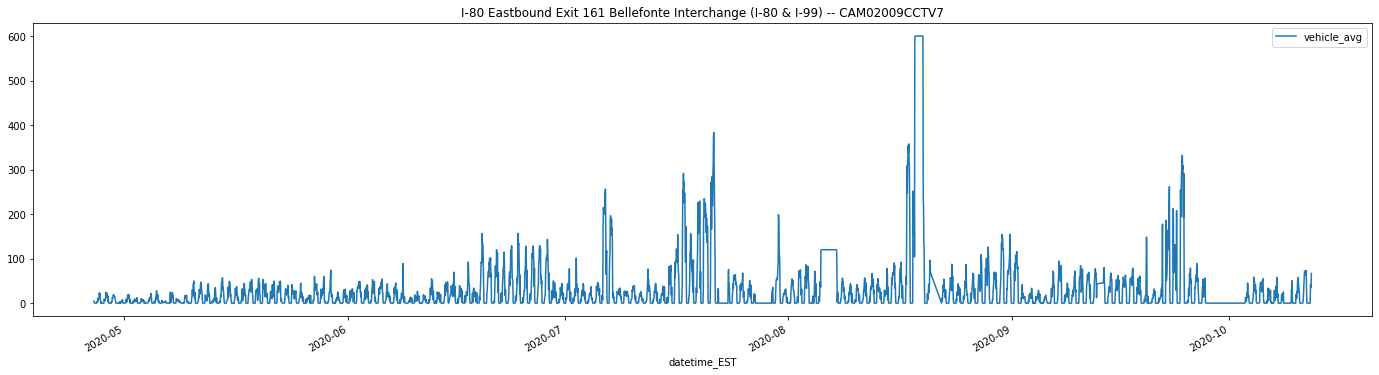

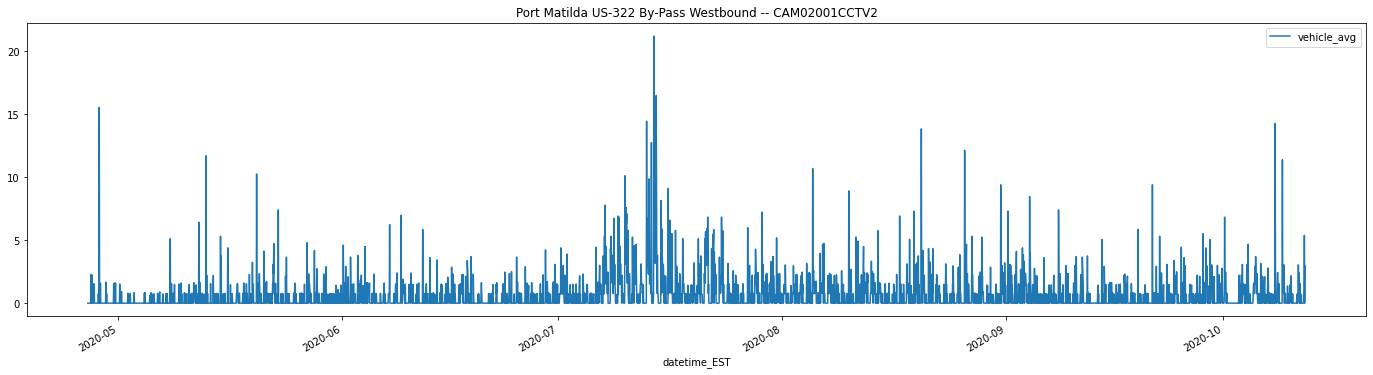

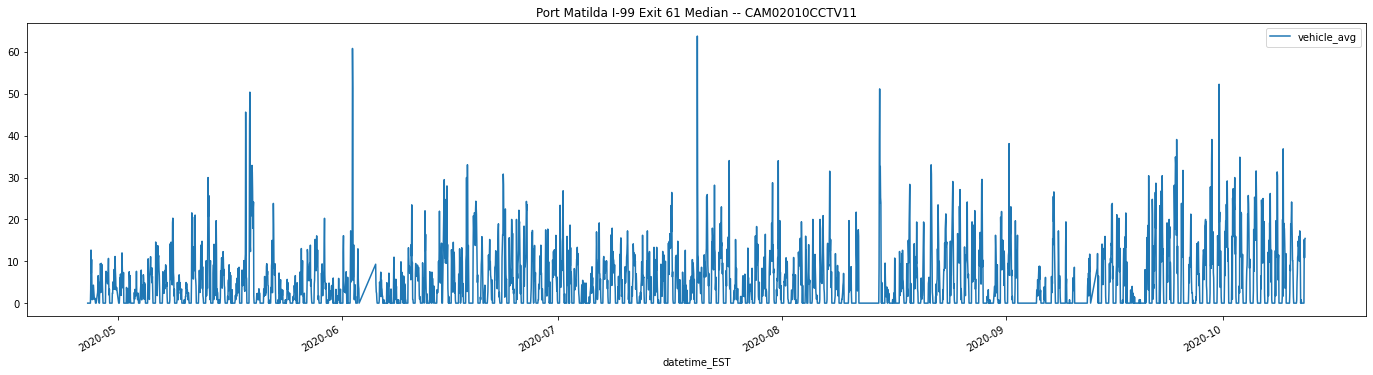

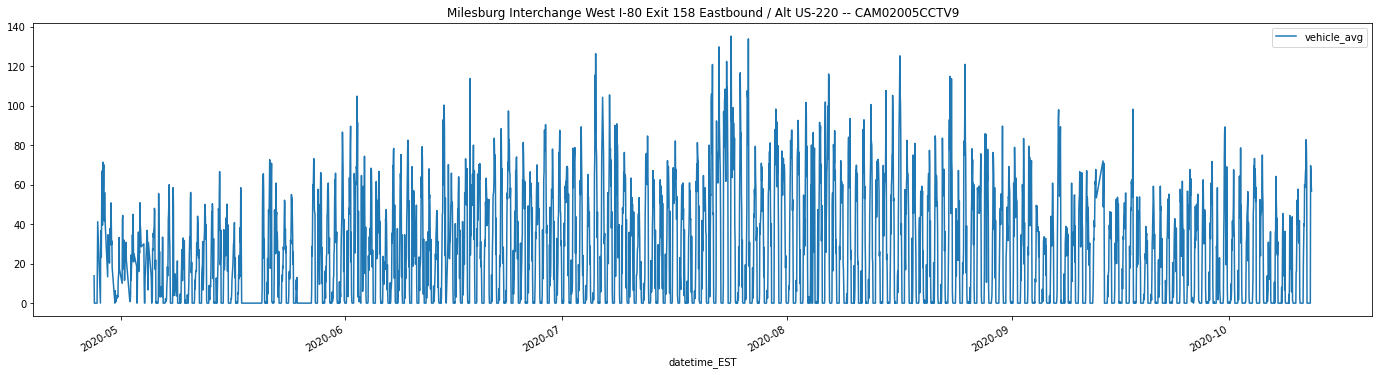

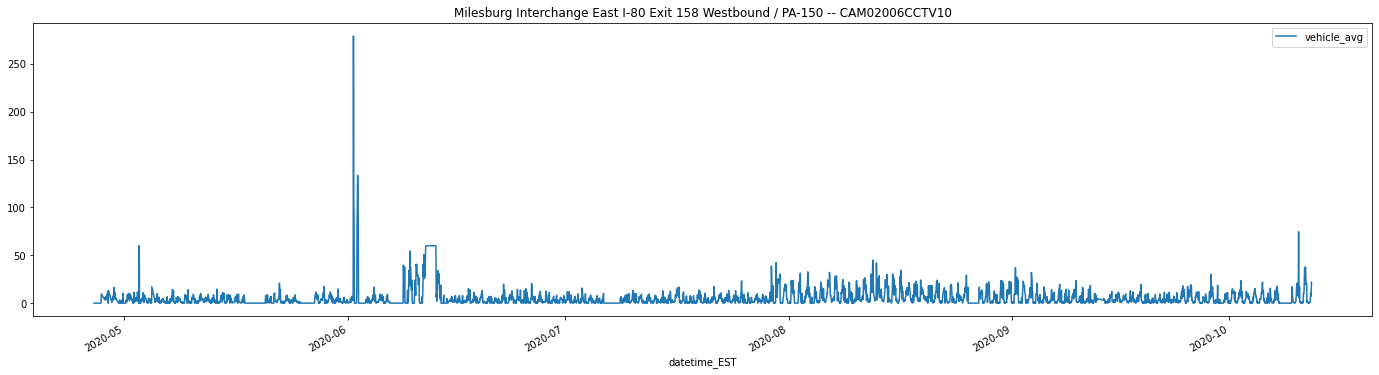

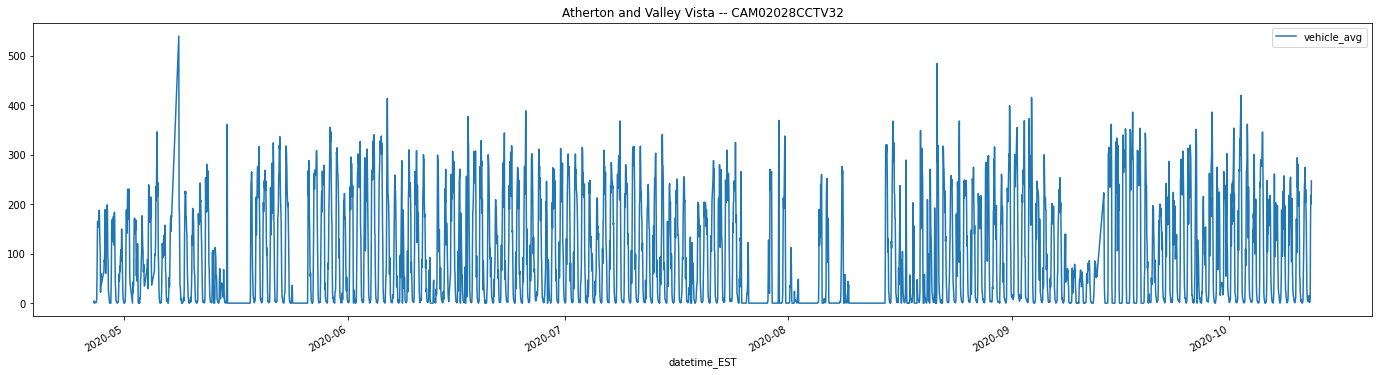

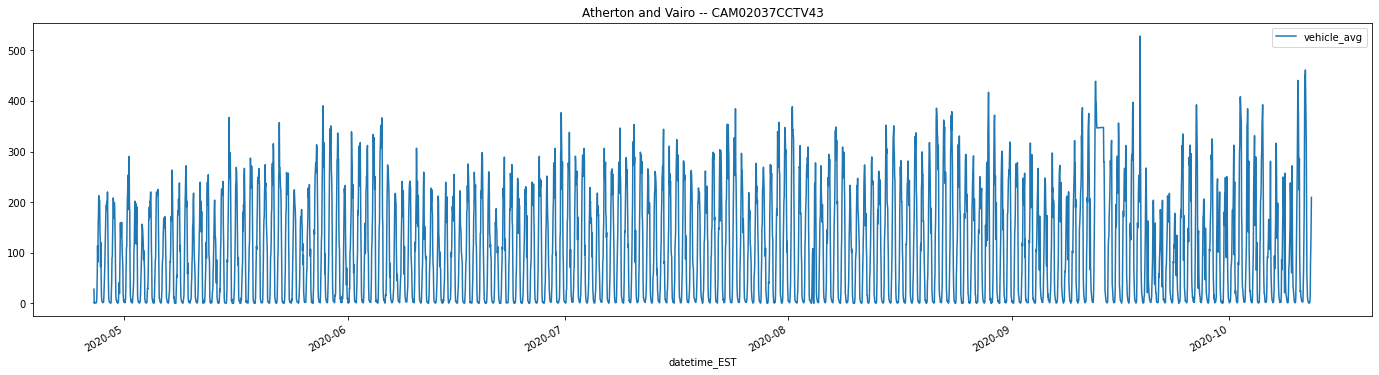

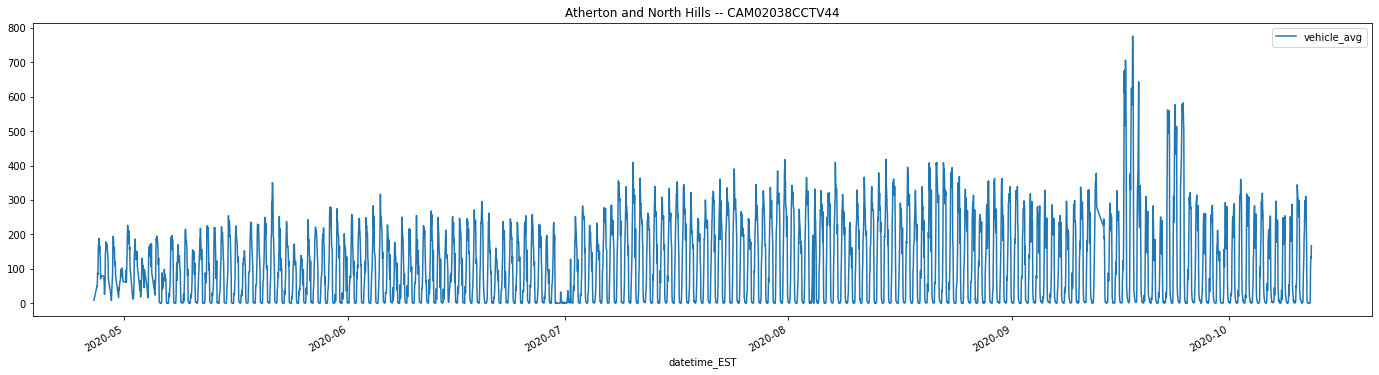

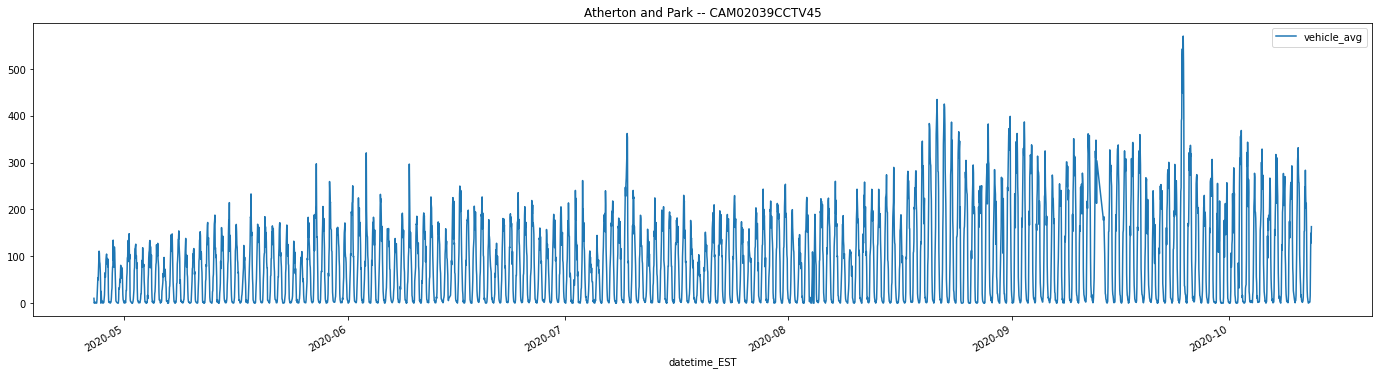

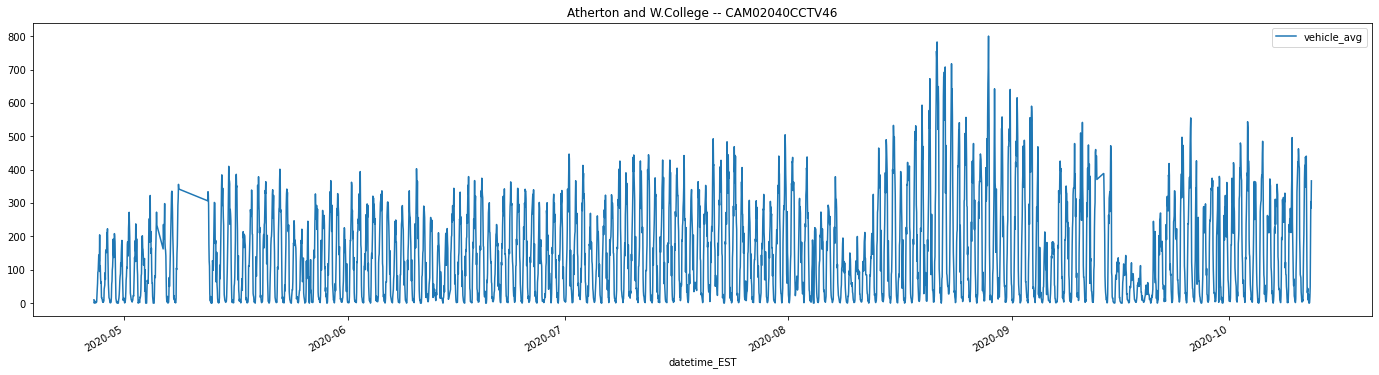

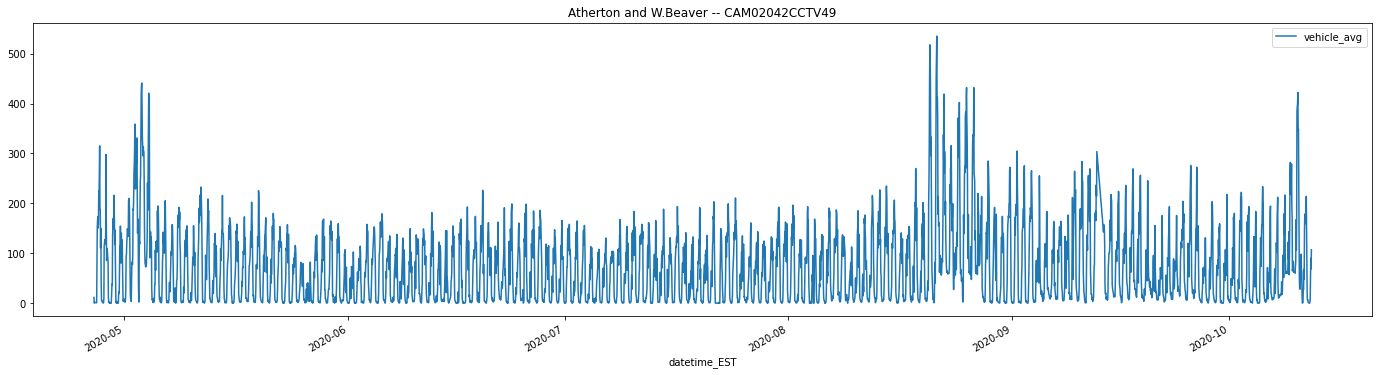

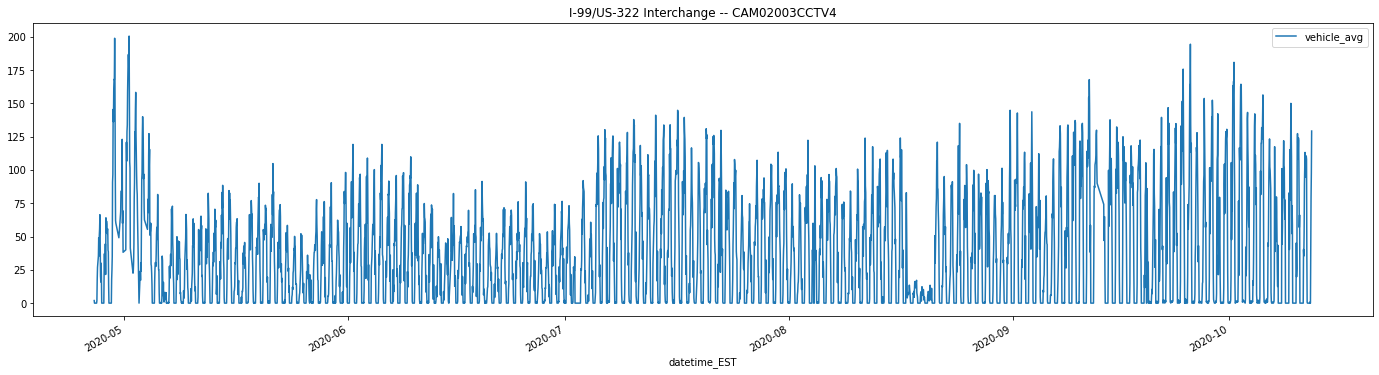

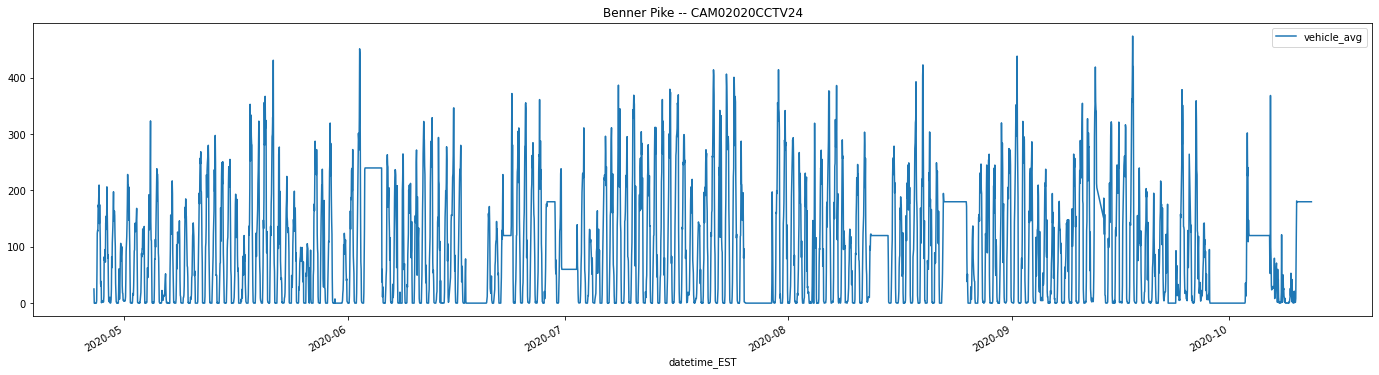

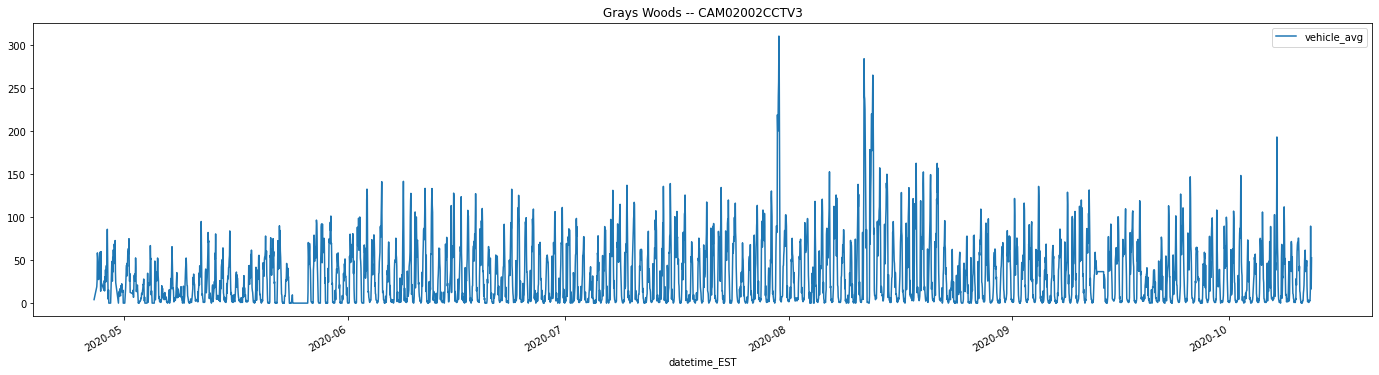

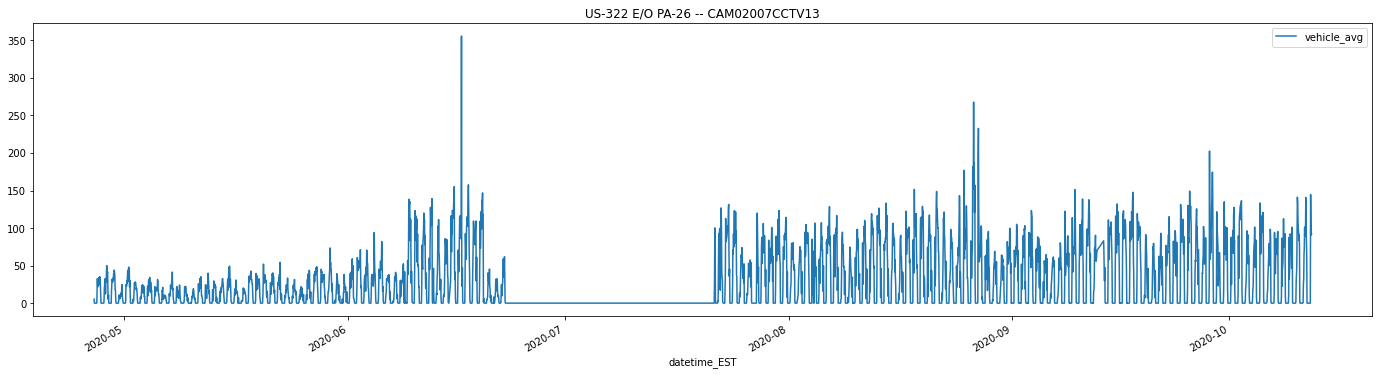

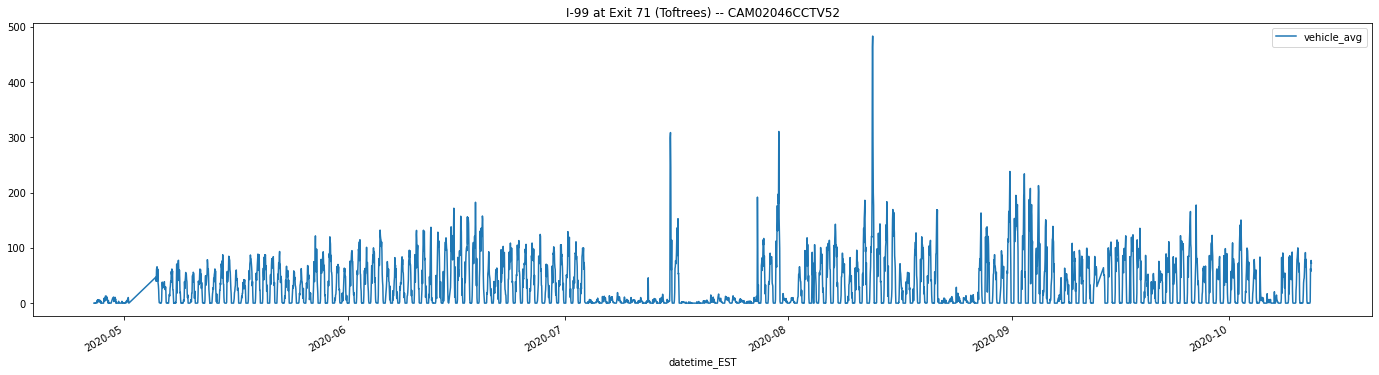

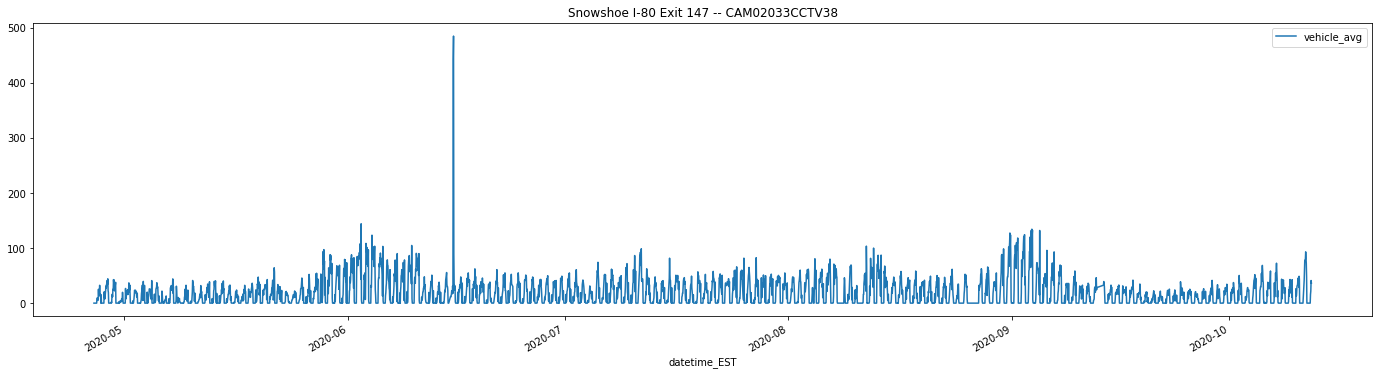

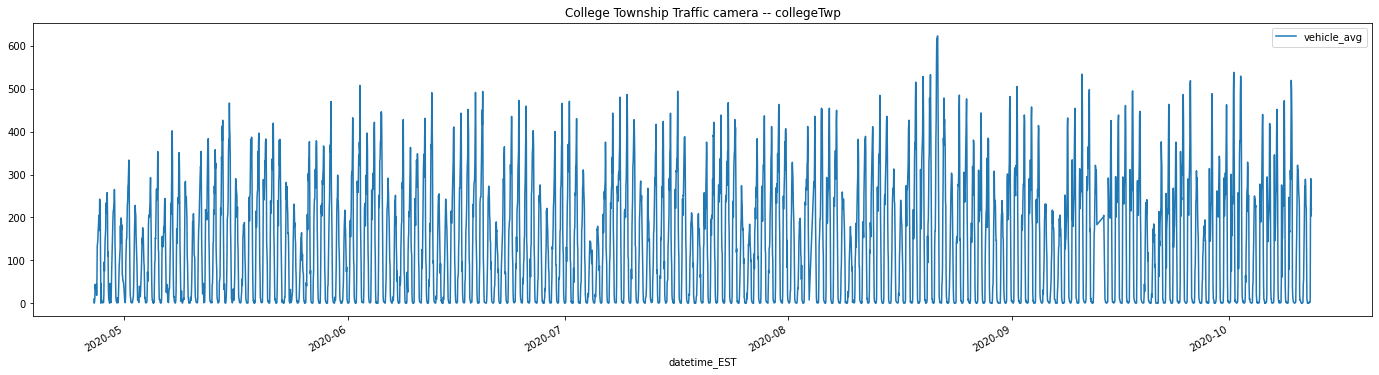

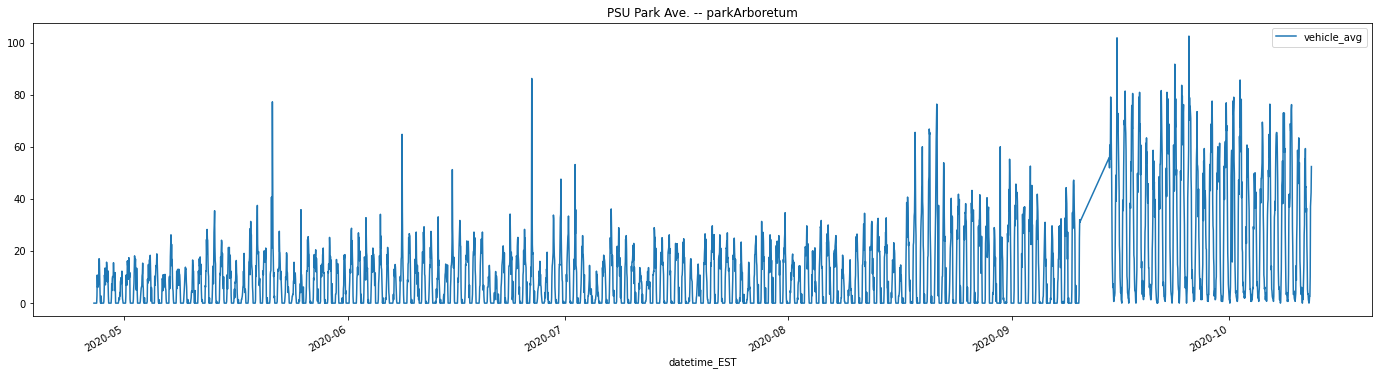

In [6]:
for c in cameras:
    cn = c[0][:-4]
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    ax = fdf_twp.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

In [7]:
xdf

datetime_UTC  \
0        2020-04-27 00:00:02   
1        2020-04-27 00:00:05   
2        2020-04-27 00:00:08   
3        2020-04-27 00:00:10   
4        2020-04-27 00:00:12   
...                      ...   
6070356  2020-10-12 14:53:19   
6070357  2020-10-12 14:53:21   
6070358  2020-10-12 14:53:23   
6070359  2020-10-12 14:53:26   
6070360  2020-10-12 14:53:30   

                                                image_file  vehicle_count  \
0        /home/ubuntu/cams1/20200427_000002_CAM02033CCT...              0   
1        /home/ubuntu/cams1/20200427_000005_collegeTwp.jpg              2   
2        /home/ubuntu/cams1/20200427_000008_CAM02028CCT...              1   
3        /home/ubuntu/cams1/20200427_000010_CAM02037CCT...              3   
4        /home/ubuntu/cams1/20200427_000012_CAM02038CCT...              0   
...                                                    ...            ...   
6070356  /home/ubuntu/cams31/CAM02046CCTV52/20201012/20...              0   
6070357  /home/ubuntu/cams31/CAM02009CCTV7/20201012/202...              2   
6070358  /home/ubuntu/cams31/CAM02001CCTV2/20201012/202...              0   
6070359  /home/ubuntu/cams31/CAM02010CCTV11/20201012/20...              0   
6070360  /home/ubuntu/cams31/CAM02006CCTV10/20201012/20...              0   

               datetime_EST     camera_name  
0       2020-04-26 20:00:02  CAM02033CCTV38  
1       2020-04-26 20:00:05      collegeTwp  
2       2020-04-26 20:00:08  CAM02028CCTV32  
3       2020-04-26 20:00:10  CAM02037CCTV43  
4       2020-04-26 20:00:12  CAM02038CCTV44  
...                     ...             ...  
6070356 2020-10-12 10:53:19  CAM02046CCTV52  
6070357 2020-10-12 10:53:21   CAM02009CCTV7  
6070358 2020-10-12 10:53:23   CAM02001CCTV2  
6070359 2020-10-12 10:53:26  CAM02010CCTV11  
6070360 2020-10-12 10:53:30  CAM02006CCTV10  

[6070361 rows x 5 columns]

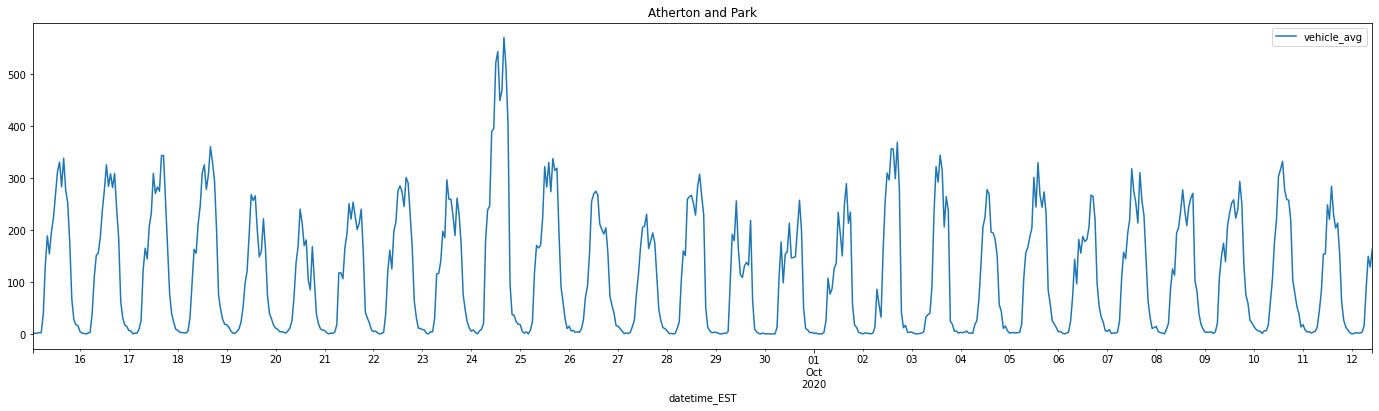

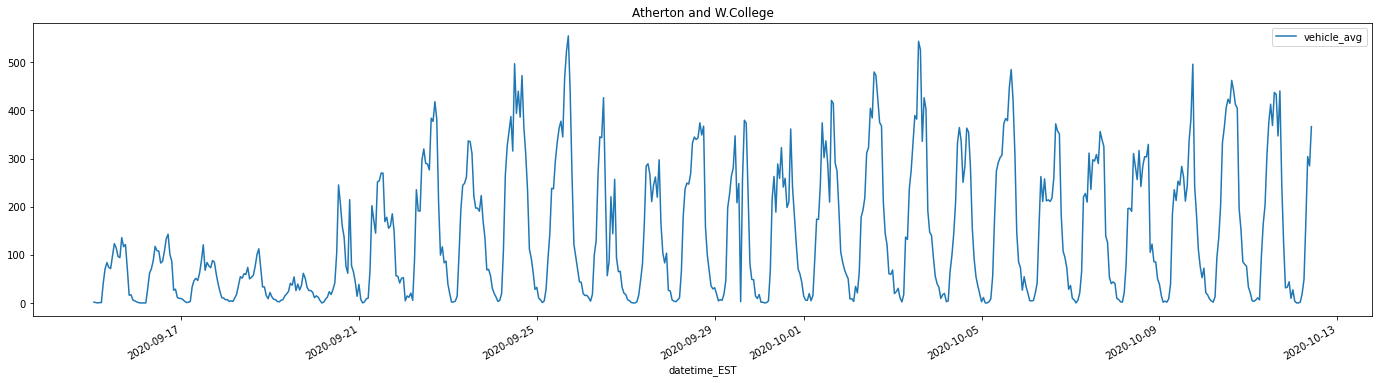

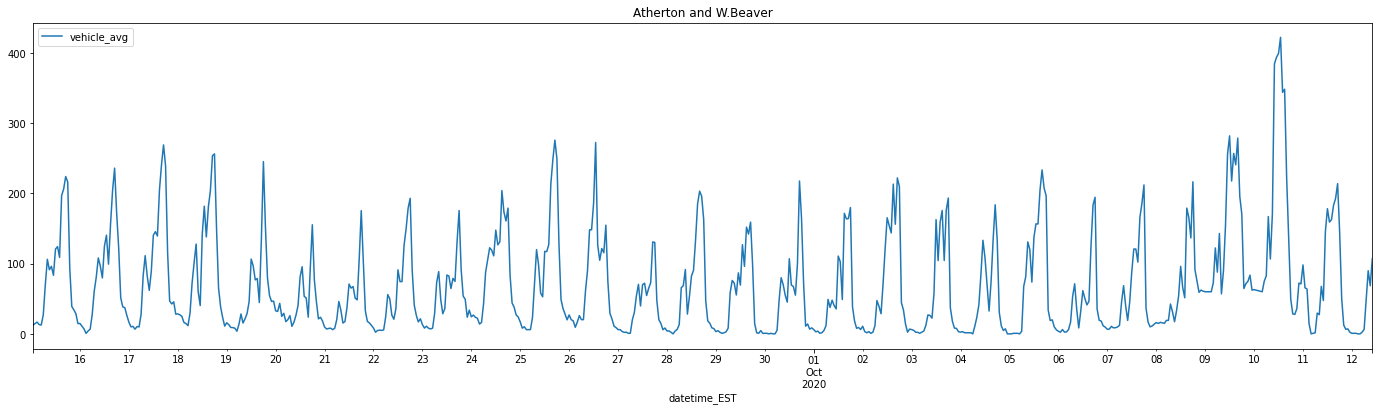

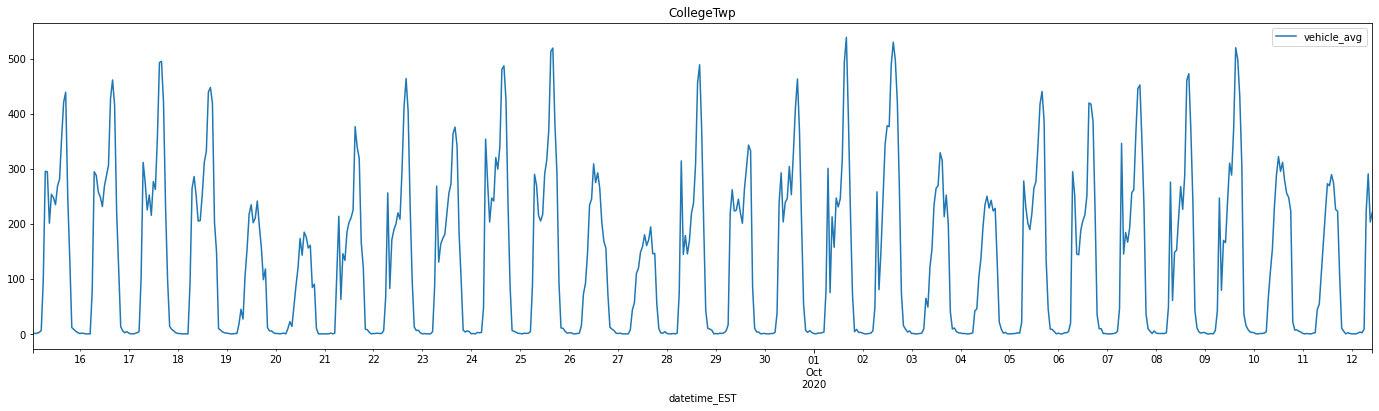

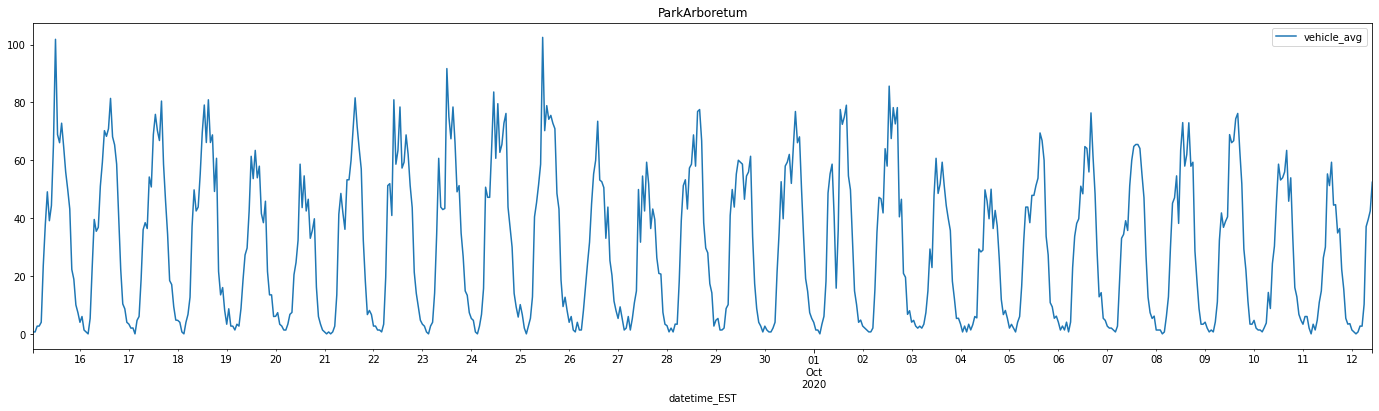

In [28]:
lbs = ["Atherton and Park","Atherton and W.College","Atherton and W.Beaver","CollegeTwp","ParkArboretum"]
lc = 0
for c in ["CCTV45","CCTV46","CCTV49","collegeTwp","park"]:
    cn = c
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    fdf_twp = fdf_twp[(fdf_twp['datetime_EST'] > '2020-9-15 00:00:00') ] 
    ax = fdf_twp.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"{lbs[lc]}")
    lc += 1

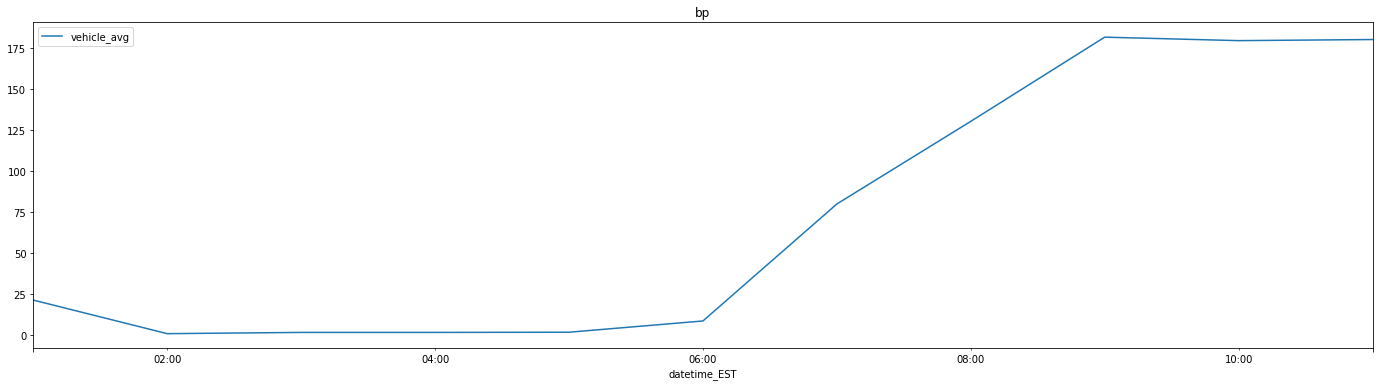

In [35]:
lbs = ["bp"]
lc = 0
for c in ["CCTV24"]:
    cn = c
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    fdf_twp = fdf_twp[(fdf_twp['datetime_EST'] > '2020-10-10 00:00:00') & (fdf_twp['datetime_EST'] < '2020-10-10 12:00:00')] 
    ax = fdf_twp.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"{lbs[lc]}")
    lc += 1

In [9]:
icdfcvc.to_csv("vehicle_avg_per_hour_each_camera_427-1012.csv",index=False)

In [10]:
xdf

datetime_UTC  \
0        2020-04-27 00:00:02   
1        2020-04-27 00:00:05   
2        2020-04-27 00:00:08   
3        2020-04-27 00:00:10   
4        2020-04-27 00:00:12   
...                      ...   
6070356  2020-10-12 14:53:19   
6070357  2020-10-12 14:53:21   
6070358  2020-10-12 14:53:23   
6070359  2020-10-12 14:53:26   
6070360  2020-10-12 14:53:30   

                                                image_file  vehicle_count  \
0        /home/ubuntu/cams1/20200427_000002_CAM02033CCT...              0   
1        /home/ubuntu/cams1/20200427_000005_collegeTwp.jpg              2   
2        /home/ubuntu/cams1/20200427_000008_CAM02028CCT...              1   
3        /home/ubuntu/cams1/20200427_000010_CAM02037CCT...              3   
4        /home/ubuntu/cams1/20200427_000012_CAM02038CCT...              0   
...                                                    ...            ...   
6070356  /home/ubuntu/cams31/CAM02046CCTV52/20201012/20...              0   
6070357  /home/ubuntu/cams31/CAM02009CCTV7/20201012/202...              2   
6070358  /home/ubuntu/cams31/CAM02001CCTV2/20201012/202...              0   
6070359  /home/ubuntu/cams31/CAM02010CCTV11/20201012/20...              0   
6070360  /home/ubuntu/cams31/CAM02006CCTV10/20201012/20...              0   

               datetime_EST     camera_name  
0       2020-04-26 20:00:02  CAM02033CCTV38  
1       2020-04-26 20:00:05      collegeTwp  
2       2020-04-26 20:00:08  CAM02028CCTV32  
3       2020-04-26 20:00:10  CAM02037CCTV43  
4       2020-04-26 20:00:12  CAM02038CCTV44  
...                     ...             ...  
6070356 2020-10-12 10:53:19  CAM02046CCTV52  
6070357 2020-10-12 10:53:21   CAM02009CCTV7  
6070358 2020-10-12 10:53:23   CAM02001CCTV2  
6070359 2020-10-12 10:53:26  CAM02010CCTV11  
6070360 2020-10-12 10:53:30  CAM02006CCTV10  

[6070361 rows x 5 columns]

In [55]:
# drop frozen images from Benner Pike
# jun 3 12:05:14 jun 5 21:01:59
xdfn = xdf.drop(xdf[(xdf["camera_name"] == "CAM02020CCTV24") & (xdf['datetime_EST'] > '2020-6-3 12:05:14') & (xdf['datetime_EST'] <= '2020-6-5 21:01:59') ].index)

# jun 3 12:05:14 jun 5 21:01:59
xdfn1 = xdfn.drop(xdfn[(xdfn["camera_name"] == "CAM02020CCTV24") & (xdfn['datetime_EST'] > '2020-6-22 12:05:00') & (xdfn['datetime_EST'] <= '2020-6-23 15:50:00') ].index)

xdfn2 = xdfn1#.drop(xdfn1[(xdfn1["camera_name"] == "CAM02020CCTV24") & (xdfn1['datetime_EST'] > '2020-6-28 14:06:00') ].index)

# drop frozen images from Bellefonte exchange:
#(fdft['datetime_EST'] > '2020-8-18 12:04:00') & (fdft['datetime_EST'] < '2020-8-19 16:03:00')
xdfn3 = xdfn2.drop(xdfn2[(xdfn2["camera_name"] == "CAM02009CCTV7") & (xdfn2['datetime_EST'] > '2020-8-18 12:04:00') & (xdfn2['datetime_EST'] < '2020-8-19 16:03:00') ].index)

xdfn4 = xdfn3.drop(xdfn3[(xdfn3['datetime_EST'] > '2020-9-12 18:00:00') & (xdfn3['datetime_EST'] < '2020-9-13 13:00:00') ].index)

xdfn5 = xdfn4.drop(xdfn4[(xdfn4["camera_name"] == "CAM02020CCTV24") & (xdfn4['datetime_EST'] > '2020-10-10 12:00:00')].index)


In [56]:
icdf = xdfn5.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn5.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdfn5.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn5.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [57]:
#xdf.set_index('datetime_EST', drop=False, inplace=True)
#df_sampledh = xdf.set_index('datetime_EST').resample('H').sum().reset_index()

xdfn5.set_index('datetime_EST', drop=False, inplace=True)
df_sampledh = xdfn5.set_index('datetime_EST').resample('H').sum().reset_index()

In [58]:
df_sampledh

datetime_EST  vehicle_count
0    2020-04-26 20:00:00            144
1    2020-04-26 21:00:00              0
2    2020-04-26 22:00:00             11
3    2020-04-26 23:00:00             38
4    2020-04-27 00:00:00             77
...                  ...            ...
4042 2020-10-12 06:00:00            193
4043 2020-10-12 07:00:00           1933
4044 2020-10-12 08:00:00           2392
4045 2020-10-12 09:00:00           2288
4046 2020-10-12 10:00:00           2613

[4047 rows x 2 columns]

In [59]:
icdfs

datetime_EST  image_sum
0    2020-04-26 20:00:00        960
1    2020-04-26 21:00:00         68
2    2020-04-26 22:00:00        516
3    2020-04-26 23:00:00        794
4    2020-04-27 00:00:00        796
...                  ...        ...
4021 2020-10-12 06:00:00       1513
4022 2020-10-12 07:00:00       1487
4023 2020-10-12 08:00:00       1485
4024 2020-10-12 09:00:00       1457
4025 2020-10-12 10:00:00       1296

[4026 rows x 2 columns]

In [60]:
merged = df_sampledh.merge(icdfs, on='datetime_EST')

In [61]:
merged

datetime_EST  vehicle_count  image_sum
0    2020-04-26 20:00:00            144        960
1    2020-04-26 21:00:00              0         68
2    2020-04-26 22:00:00             11        516
3    2020-04-26 23:00:00             38        794
4    2020-04-27 00:00:00             77        796
...                  ...            ...        ...
4021 2020-10-12 06:00:00            193       1513
4022 2020-10-12 07:00:00           1933       1487
4023 2020-10-12 08:00:00           2392       1485
4024 2020-10-12 09:00:00           2288       1457
4025 2020-10-12 10:00:00           2613       1296

[4026 rows x 3 columns]

In [62]:
df_sampledh = merged

In [63]:
df_sampledh

datetime_EST  vehicle_count  image_sum
0    2020-04-26 20:00:00            144        960
1    2020-04-26 21:00:00              0         68
2    2020-04-26 22:00:00             11        516
3    2020-04-26 23:00:00             38        794
4    2020-04-27 00:00:00             77        796
...                  ...            ...        ...
4021 2020-10-12 06:00:00            193       1513
4022 2020-10-12 07:00:00           1933       1487
4023 2020-10-12 08:00:00           2392       1485
4024 2020-10-12 09:00:00           2288       1457
4025 2020-10-12 10:00:00           2613       1296

[4026 rows x 3 columns]

In [64]:
def get_vc_avg(row):
    rv = 0.0
    if row.image_sum > 0:
        rv = (float(row.vehicle_count) / (float(row.image_sum)/(19.0 * 60.0)))
    return rv   



In [65]:
df_sampledh['vehicle_avg'] = df_sampledh.apply(get_vc_avg, axis=1)

In [66]:
df_sampledh.to_csv("vehicle_avg_per_hour_all_cameras_427-1012.csv",index=False)

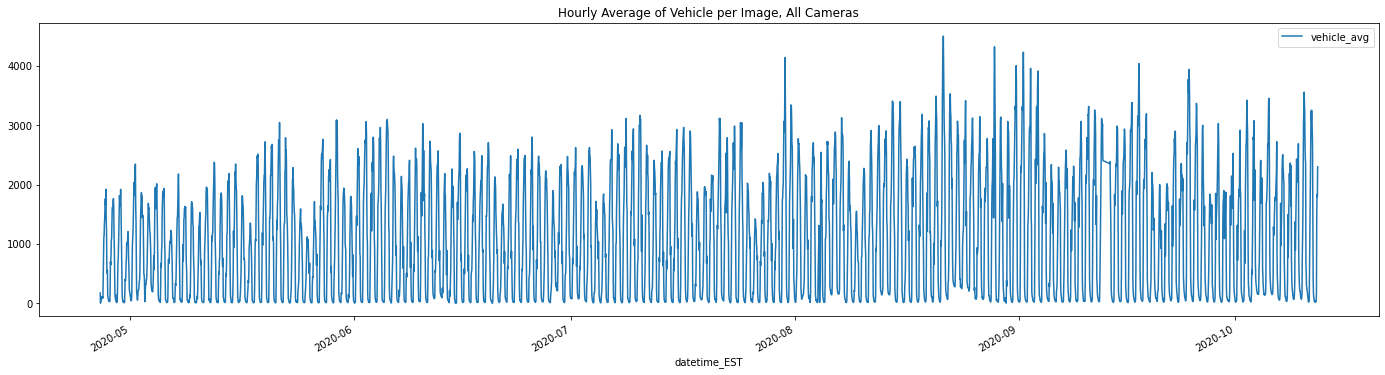

In [67]:
df_sampledh['datetime_EST'] = pd.to_datetime(df_sampledh['datetime_EST'])
df_sampledh.sort_values(by='datetime_EST')
df_sampledh.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Vehicle per Image, All Cameras")

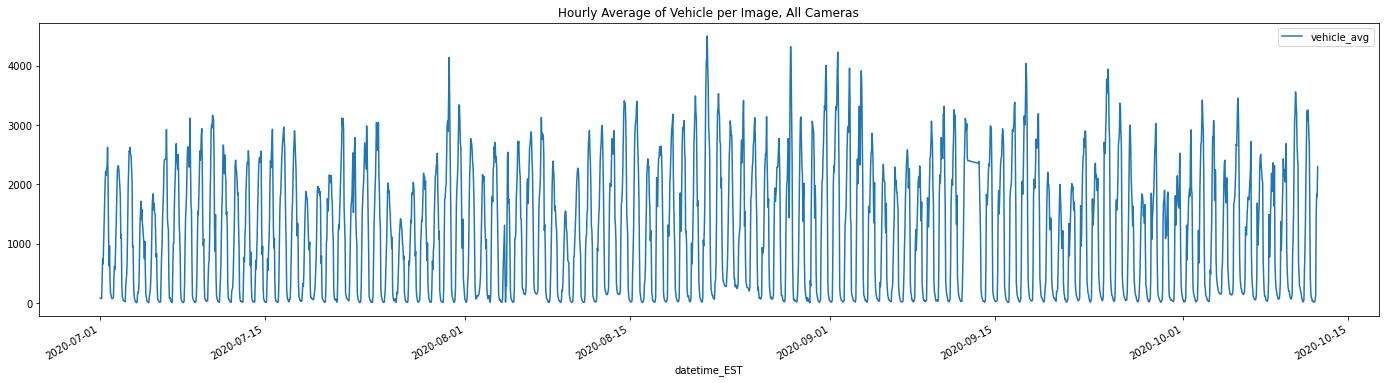

In [68]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2020-7-1 00:00:00') ] 
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Vehicle per Image, All Cameras")

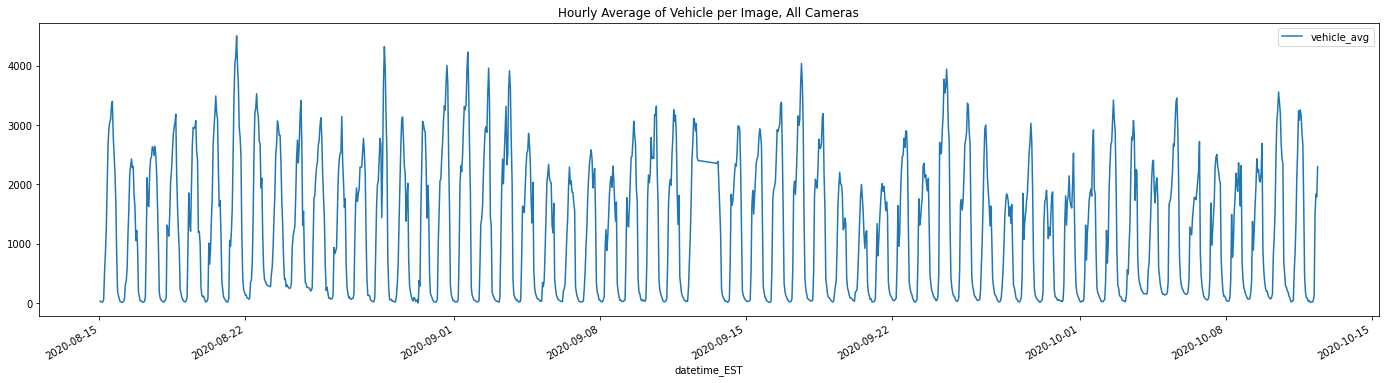

In [69]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2020-8-15 00:00:00') ] 
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Vehicle per Image, All Cameras")

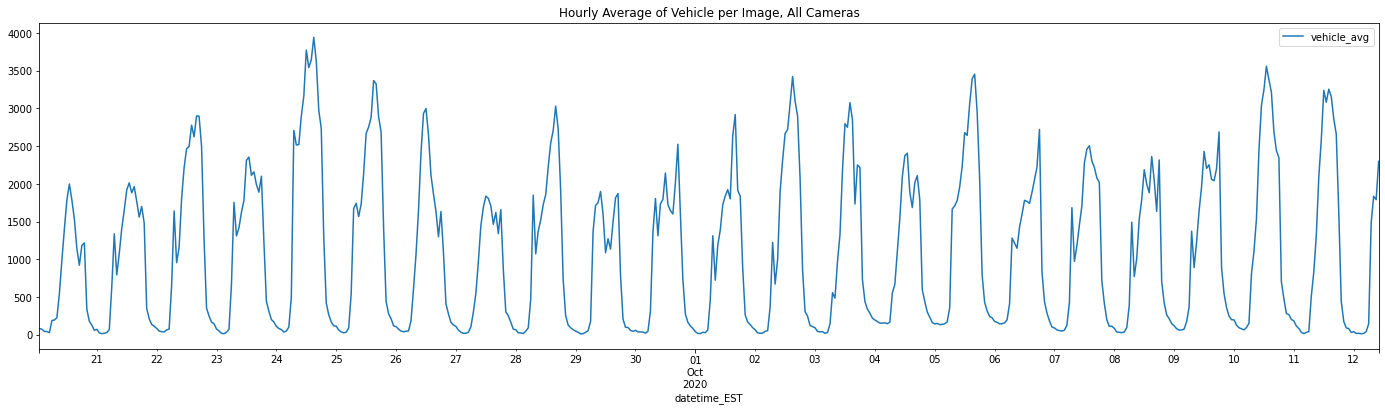

In [70]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2020-9-20 00:00:00')]

                   
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Vehicle per Image, All Cameras")

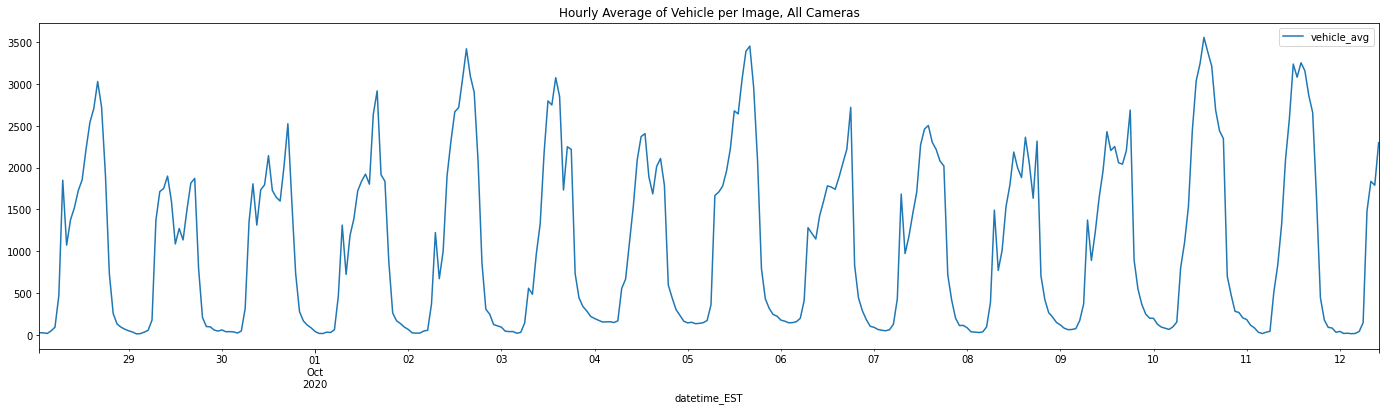

In [71]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2020-9-28 00:00:00')]

                   
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Vehicle per Image, All Cameras")

In [72]:
from platform import python_version
import tensorflow
import keras
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox

/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

88
/home/ubuntu/cams31/20201008_131045_CAM02042CCTV49.jpg


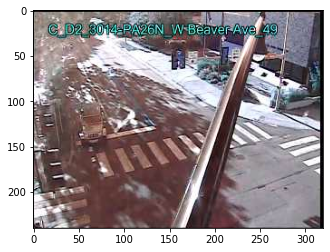

/home/ubuntu/cams31/20201008_133426_CAM02042CCTV49.jpg


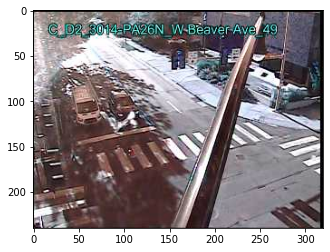

/home/ubuntu/cams31/20201008_135525_CAM02042CCTV49.jpg


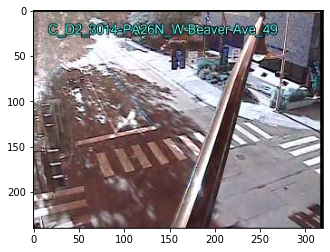

88
/home/ubuntu/cams31/20201009_130503_CAM02042CCTV49.jpg


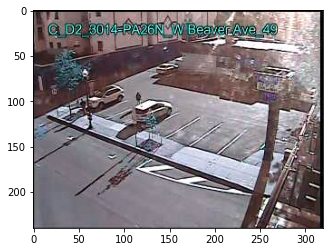

/home/ubuntu/cams31/20201009_134121_CAM02042CCTV49.jpg


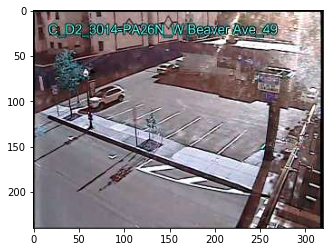

/home/ubuntu/cams31/20201009_135011_CAM02042CCTV49.jpg

89
/home/ubuntu/cams31/20201010_132510_CAM02042CCTV49.jpg


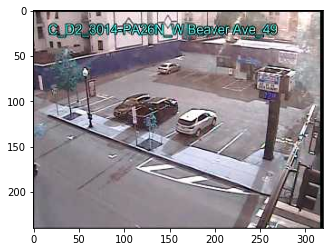

/home/ubuntu/cams31/20201010_135213_CAM02042CCTV49.jpg


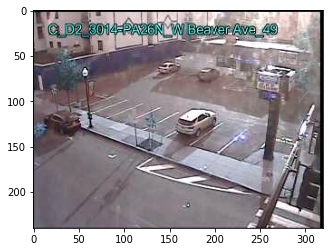

/home/ubuntu/cams31/20201010_130653_CAM02042CCTV49.jpg


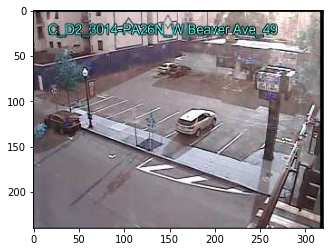

89
/home/ubuntu/cams31/20201011_132909_CAM02042CCTV49.jpg


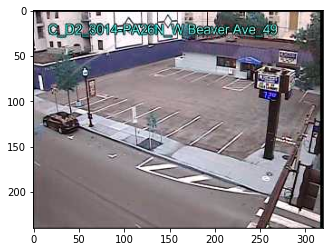

/home/ubuntu/cams31/20201011_132425_CAM02042CCTV49.jpg


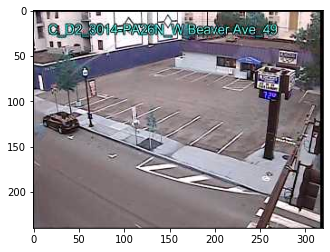

/home/ubuntu/cams31/20201011_131052_CAM02042CCTV49.jpg


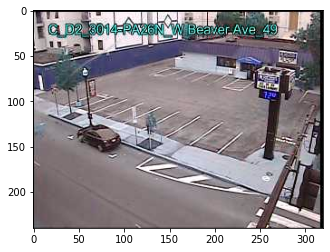

89
/home/ubuntu/cams31/20201012_134729_CAM02042CCTV49.jpg


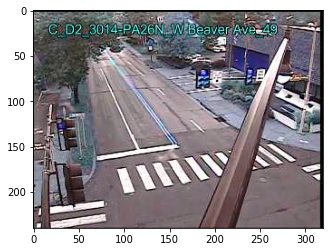

/home/ubuntu/cams31/20201012_132630_CAM02042CCTV49.jpg


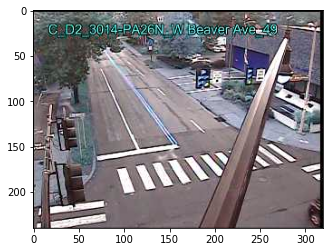

/home/ubuntu/cams31/20201012_135900_CAM02042CCTV49.jpg


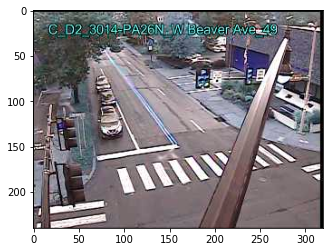

In [89]:
days = [ 
    "20201008_13",
    "20201009_13",
    "20201010_13",
    "20201011_13",
    "20201012_13"
]

cn = "CAM02042CCTV49"
os.chdir("/home/ubuntu/cams31/")
for d in days:
    #print(cn,d)
    nf = glob.glob(f"/home/ubuntu/cams31/{d}*{cn}.jpg")
    print(len(nf))
    x = 0
    for x in range(0,3):
        mnf = nf[x]
        print(mnf)
        if (os.stat(nf[x]).st_size > 9000):
            x += 1
            try:
                im = cv2.imread(nf[x])
                plt.imshow(im)
                plt.show()
            except:
                print("")

89
/home/ubuntu/cams31/20201008_150223_CAM02040CCTV46.jpg


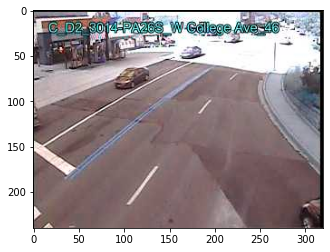

/home/ubuntu/cams31/20201008_153454_CAM02040CCTV46.jpg


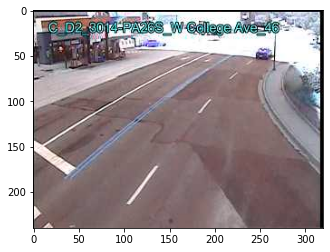

/home/ubuntu/cams31/20201008_150506_CAM02040CCTV46.jpg


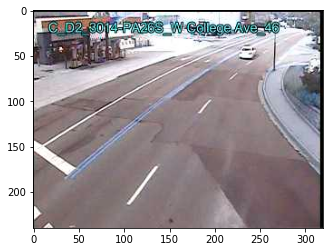

89
/home/ubuntu/cams31/20201009_155541_CAM02040CCTV46.jpg
/home/ubuntu/cams31/20201009_151145_CAM02040CCTV46.jpg


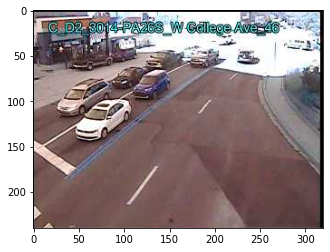

/home/ubuntu/cams31/20201009_154210_CAM02040CCTV46.jpg


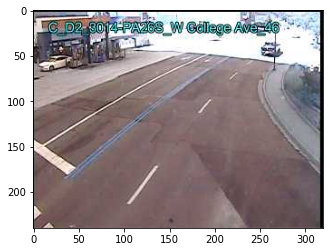

88
/home/ubuntu/cams31/20201010_152251_CAM02040CCTV46.jpg


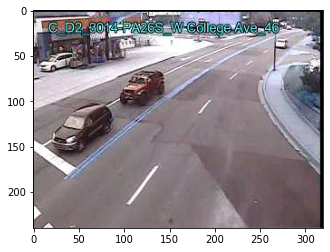

/home/ubuntu/cams31/20201010_155924_CAM02040CCTV46.jpg

/home/ubuntu/cams31/20201010_155642_CAM02040CCTV46.jpg
88
/home/ubuntu/cams31/20201011_151443_CAM02040CCTV46.jpg


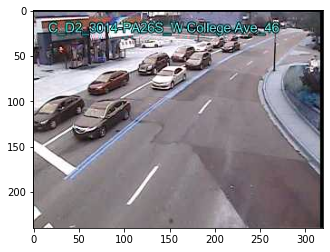

/home/ubuntu/cams31/20201011_150514_CAM02040CCTV46.jpg


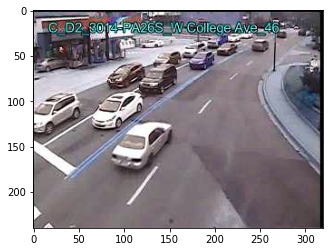

/home/ubuntu/cams31/20201011_154954_CAM02040CCTV46.jpg


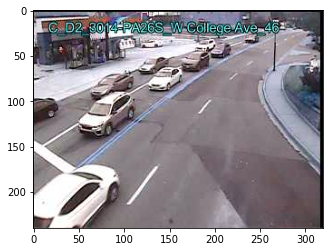

In [98]:
days = [ 
    "20201008_15",
    "20201009_15",
    "20201010_15",
    "20201011_15" 
]

cn = "CAM02040CCTV46"
os.chdir("/home/ubuntu/cams31/")
for d in days:
    #print(cn,d)
    nf = glob.glob(f"/home/ubuntu/cams31/{d}*{cn}.jpg")
    print(len(nf))
    x = 0
    for x in range(0,3):
        mnf = nf[x]
        print(mnf)
        if (os.stat(nf[x]).st_size > 9000):
            x += 1
            try:
                im = cv2.imread(nf[x])
                plt.imshow(im)
                plt.show()
            except:
                print("")